# Derivatives in Tensorflow

```
----------------------------------------------------------------------
Filename : 01_intro_to_derivatives.ipynb
Date     : 15th March, 2017
Author   : Jaidev Deshpande
Purpose  : Intuition behind derivatives of functions and
           implementation in tensorflow.
Libraries: Tensorflow and its dependencies
----------------------------------------------------------------------
```

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = 8, 6
plt.style.use('ggplot')
%matplotlib inline

Text(0, 0.5, '$f(x)$')

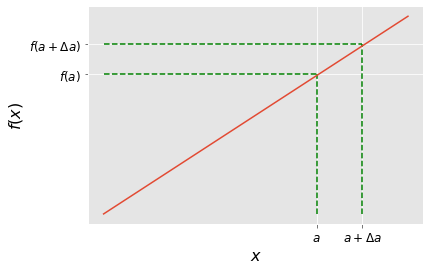

In [2]:
xx = np.linspace(0, 100, 100)
yy = 2 * xx
plt.plot(xx, yy)
plt.vlines(70, 0, yy[70], linestyles="dashed", colors="g")
plt.vlines(85, 0, yy[85], linestyles="dashed", colors="g")
plt.hlines(yy[70], 0, 70, linestyles="dashed", colors="g")
plt.hlines(yy[85], 0, 85, linestyles="dashed", colors="g")
plt.xticks([70, 85], [r"$a$", r"$a + \Delta a$"], fontsize=12, color="k")
plt.yticks([yy[70], yy[85]], [r"$f(a)$", r"$f(a + \Delta a)$"], fontsize=12, color="k")
plt.xlabel(r'$x$', fontsize=16, color="k")
plt.ylabel(r'$f(x)$', fontsize=16, color="k")

# Example: Derivative of the sigmoid function

In [3]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

Text(0, 0.5, '$\\frac{1}{1 + e^{-x}}$')

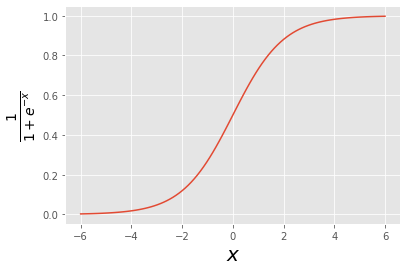

In [4]:
x = np.linspace(-6, 6, 100)
f = sigmoid(x)

plt.plot(x, f)

plt.xlabel(r'$x$', fontsize=20, color="k")
plt.ylabel(r'$\frac{1}{1 + e^{-x}}$', fontsize=20, color="k")

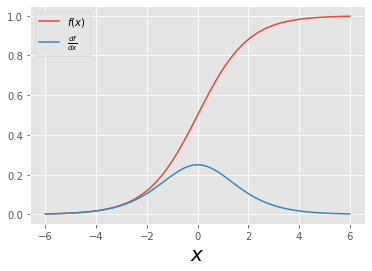

In [5]:
x = np.linspace(-6, 6, 100)
f = sigmoid(x)
df_dx = f * (1 - f)

plt.plot(x, f, label=r'$f(x)$')
plt.plot(x, df_dx, label=r'$\frac{df}{dx}$')

plt.xlabel(r'$x$', fontsize=20, color="k")
plt.legend()

# Enter Tensorflow

In [6]:
def sigmoid_tf(x):
    return 1 / (1 + tf.exp(-x))

xx = tf.constant(np.linspace(-6, 6, 100))
f = sigmoid_tf(xx)
df_dx = tf.gradients(f, xx)

RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.

## What Went Wrong?

In [7]:
with tf.GradientTape() as g:
    g.watch(xx)
    f = sigmoid_tf(xx)
df_dx = g.gradient(f, xx)

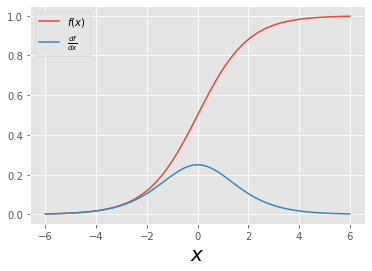

In [8]:
X = xx.numpy()
S = sigmoid_tf(xx).numpy()
dS = df_dx.numpy()
plt.plot(X, S, label=r'$f(x)$')
plt.plot(X, dS, label=r'$\frac{df}{dx}$')

plt.xlabel(r'$x$', fontsize=20, color="k")
plt.legend()

# Exercise: Plot the Hyperbolic Tangent function and its derivative
## $$tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$

In [ ]:
# Enter code here

# Multivariate Functions

## Example: $f(x, y) = x^{2}y + y$

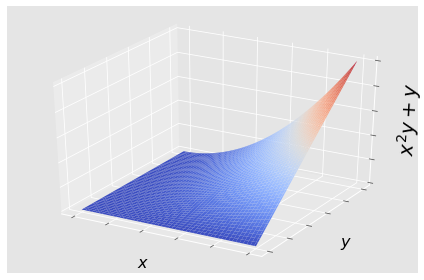

In [9]:
xx = np.linspace(0, 10, 100)
yy = np.linspace(0, 10, 100)
X, Y = np.meshgrid(xx, yy)
f = Y * (X ** 2 + 1)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f, cmap=plt.cm.coolwarm)
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlabel(r'$x$', fontsize=16, color="k")
ax.set_ylabel(r'$y$', fontsize=16, color="k")
ax.set_zlabel(r'$x^{2}y + y$', fontsize=20, color="k", labelpad=0)
ax.autoscale_view()
plt.tight_layout()

In [10]:
del_f = np.c_[2 * xx * yy, (xx ** 2) + 1].T

In [11]:
def func(x, y):
    return tf.pow(x, 2) * y + y

x = tf.constant(xx)
y = tf.constant(yy)
with tf.GradientTape() as g:
    g.watch(y)
    g.watch(x)
    f = func(x, y)
dx, dy = g.gradient(f, [x, y])

In [12]:
np.allclose(np.c_[dx.numpy(), dy.numpy()], del_f.T)

True

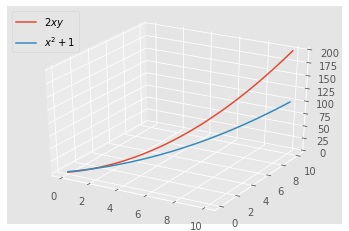

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(xx, yy, dx.numpy(), label=r"$2xy$")
ax.plot(xx, yy, dy.numpy(), label=r"$x^{2} + 1$")
ax.legend()

# Exercise: $f(x, y) = \sin(\sqrt{x^{2} + y^{2}})$
# 1. Plot surface of $f$
# 2. Find and plot$\nabla{f}$

In [ ]:
# Enter code here